# Pandas

### Work:

**Calculate statistics and answer questions about the data, like**

**What's the average, median, max, or min of each column?**

**Does column A correlate with column B?**

**What does the distribution of data in column C look like?**

**Clean the data by doing things like removing missing values and filtering rows or columns by some criteria**

**Visualize the data with help from Matplotlib. Plot bars, lines, histograms, bubbles, and more.**

**Store the cleaned, transformed data back into a CSV, other file or database**

In [1]:
import pandas as pd

Series Vs DataFrame

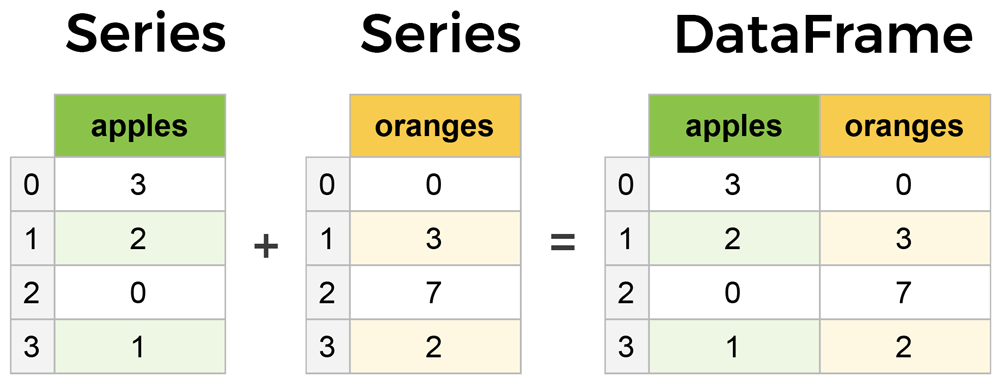

In [2]:
data = { 'apples':[1,2,3,4,5],
          'oranges':[2,3,4,5,3]}

dic = {'a':5 , 'b':6}

In [3]:
data

{'apples': [1, 2, 3, 4, 5], 'oranges': [2, 3, 4, 5, 3]}

DataFrame from dict...

In [4]:
cell = pd.DataFrame(data) # initialization

In [5]:
cell

,apples,oranges
0,1,2
1,2,3
2,3,4
3,4,5
4,5,3


In [6]:
# you can also name the index

cell = pd.DataFrame(data,index=['raju','gopi','chintu','digu','bindu'])

In [7]:
cell

,apples,oranges
raju,1,2
gopi,2,3
chintu,3,4
digu,4,5
bindu,5,3


In [8]:
# details about index

cell.loc['raju']

apples     1
oranges    2
Name: raju, dtype: int64

## Reading the data

In [9]:
# df = pd.read_csv('purchases.csv')
# df = pd.read_csv('purchases.csv', index_col=0)
# df = pd.read_json('purchases.json')
# !pip install pysqlite3
#import sqlite3
#con = sqlite3.connect("database.db")


In [10]:
cell.to_csv('new_purchases.csv') ## saving the dataframe as csv

In [11]:
df = pd.read_csv('new_purchases.csv')

In [12]:
df

,Unnamed: 0,apples,oranges
0,raju,1,2
1,gopi,2,3
2,chintu,3,4
3,digu,4,5
4,bindu,5,3


In [13]:
## now here the index dont have name
# we can name it
df = pd.read_csv('new_purchases.csv', index_col=0)

In [14]:
df.columns

Index(['apples', 'oranges'], dtype='object')

## Most important DataFrame operations

In [15]:
 # movies_df = pd.read_csv("IMDB-Movie-Data.csv", index_col="Title")

We're loading this dataset from a CSV and designating the movie titles to be our index.

In [16]:
 # movies_df.head()

print out a few rows to keep as a visual reference.

In [17]:
# movies_df.tail(2)

last two data

In [18]:
# movies_df.info()


provides the essential details about your dataset, such as the number of rows and columns, the number of non-null values, what type of data is in each column, and how much memory your DataFrame is using.

In [19]:
# movies_df.shape

which outputs just a tuple of (rows, columns):

In [20]:
temp_df = df.append(df)

In [21]:
temp_df

,apples,oranges
raju,1,2
gopi,2,3
chintu,3,4
digu,4,5
bindu,5,3
raju,1,2
gopi,2,3
chintu,3,4
digu,4,5
bindu,5,3


In [22]:
# Using inplace=True will modify the DataFrame object in place
temp_df.drop_duplicates(inplace = True , keep= False)

In [23]:
temp_df

,apples,oranges


In [24]:
df.columns

Index(['apples', 'oranges'], dtype='object')

In [25]:
df.rename(columns = {'apples':'cherry'}, inplace = True)

In [26]:
df

,cherry,oranges
raju,1,2
gopi,2,3
chintu,3,4
digu,4,5
bindu,5,3


In [27]:
# uppercase
df.columns = [col.upper() for col in df]

In [28]:
df

,CHERRY,ORANGES
raju,1,2
gopi,2,3
chintu,3,4
digu,4,5
bindu,5,3


## There are two options in dealing with nulls:
   * Get rid of rows or columns with nulls
   * Replace nulls with non-null values, a technique known as imputation
   

In [29]:
df.isnull()

,CHERRY,ORANGES
raju,False,False
gopi,False,False
chintu,False,False
digu,False,False
bindu,False,False


In [30]:
df
df = pd.read_csv('new_purchases.csv', index_col=0)

In [31]:
df

,apples,oranges
raju,1,2
gopi,2,3
chintu,3,4
digu,4,5
bindu,5,3


In [32]:
df.isnull()

,apples,oranges
raju,False,False
gopi,False,False
chintu,False,False
digu,False,False
bindu,False,False


In [33]:
# How many null value
df.isnull().sum()

apples     0
oranges    0
dtype: int64

This operation will delete any row with at least a single null value, but it will return a new DataFrame without altering the original one. You could specify inplace=True in this method as well

In [34]:
df.dropna(axis=1) # remove column with the null value

,apples,oranges
raju,1,2
gopi,2,3
chintu,3,4
digu,4,5
bindu,5,3


In [35]:
df.dropna() # remove the row with the null value

,apples,oranges
raju,1,2
gopi,2,3
chintu,3,4
digu,4,5
bindu,5,3


### Imputation is a conventional feature engineering technique used to keep valuable data that have null values.

**There may be instances where dropping every row with a null value removes too big a chunk from your dataset, so instead we can impute that null with another value, usually the mean or the median of that column.**

In [36]:
apple = df['apples']

In [37]:
apple

raju      1
gopi      2
chintu    3
digu      4
bindu     5
Name: apples, dtype: int64

In [38]:
apple_mean = apple.mean()

In [39]:
apple_mean

3.0

With the mean, let's fill the nulls using fillna():

In [40]:
df.fillna(apple_mean) ## missing value has been filled for changing the real data use inplace = True

,apples,oranges
raju,1,2
gopi,2,3
chintu,3,4
digu,4,5
bindu,5,3


Using describe() on an entire DataFrame we can get a summary of the distribution of continuous variables:

In [41]:
df.describe()

,apples,oranges
count,5.000000,5.000000
mean,3.000000,3.400000
std,1.581139,1.140175
min,1.000000,2.000000
25%,2.000000,3.000000
50%,3.000000,3.000000
75%,4.000000,4.000000
max,5.000000,5.000000


In [42]:
df['apples'].describe()

count    5.000000
mean     3.000000
std      1.581139
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      5.000000
Name: apples, dtype: float64

In [43]:
df['apples'].value_counts().head() # tell about the frequency

1    1
2    1
3    1
4    1
5    1
Name: apples, dtype: int64

In [44]:
#correlation 
df.corr()

,apples,oranges
apples,1.0000,0.5547
oranges,0.5547,1.0000


## DataFrame slicing, selecting, extracting

In [45]:
df.iloc[1]

apples     2
oranges    3
Name: gopi, dtype: int64

In [46]:
df.loc['chintu']

apples     3
oranges    4
Name: chintu, dtype: int64

In [47]:
df.iloc[1:3]

,apples,oranges
gopi,2,3
chintu,3,4


In [52]:
condition = df['apples']>3

In [53]:
condition

raju      False
gopi      False
chintu    False
digu       True
bindu      True
Name: apples, dtype: bool

In [58]:
display = df[df['apples']>3]

In [59]:
display

,apples,oranges
digu,4,5
bindu,5,3


Using the isin() method we could make this more concise though:

In [61]:
# movies_df[movies_df['director'].isin(['Christopher Nolan', 'Ridley Scott'])].head()

### An efficient alternative is to apply() a function to the dataset. For example, we could use a function to convert movies with an 8.0 or greater to a string value of "good" and the rest to "bad" and use this transformed values to create a new column.

In [63]:
def rating_function(x):
    if x >= 3.0:
        return "good"
    else:
        return "bad"

In [68]:
df['ratings'] = df['apples'].apply(rating_function)

In [65]:
df

,apples,oranges,ratings
raju,1,2,bad
gopi,2,3,bad
chintu,3,4,good
digu,4,5,good
bindu,5,3,good


### Here we rating "good" to the shop which is  selling more than 2 apples  